[View in Colaboratory](https://colab.research.google.com/github/sbanerjee2020/alt-futures/blob/master/crypto_stats.ipynb)

# Crypto Data Stats Exploration
######  Kirby and Somnath's progress 20180708
######  Kirby has setup API Keys for Coinwartz and Fred

## Notebook Setup

In [0]:
#  I had to import requests.   SB 20180630
import requests
import pandas as pd
import numpy as np
import datetime as dt
import json
import matplotlib.pyplot as plt

### Google Drive spreadsheet I/O

In [0]:
!pip install --upgrade -q gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
worksheet = gc.open('backup_notes').sheet1
rows = worksheet.get_all_values()
kd = {r[0]:r[1] for r in rows}

In [5]:
kd

{u'CoinWarz': u'f991a99d4e4144d0aadacbb0e9e54655',
 u'Data Source': u'API Key',
 u'FRED': u'6ee33579f6b72cb3baae9f8f2c930481'}

##Blockchain Info Charts API
The Blockchain Charts & Statistics API provides a simple interface to programmatically interact with the charts and statistics displayed on blockchain.info.

Source:  https://www.blockchain.com/api/charts_api

Charts:  https://www.blockchain.com/charts

Note the path for each chart to find the specific API endpoint. Need to understand the parameters to query different time periods.

### Blockchain Info Charts API Wrapper

In [0]:
# Simple function to perform the default query of the Charts API endpoint and print the summary stats
def blockchainInfoCharts(path='n-transactions'):
  base_url = 'https://api.blockchain.info/charts/'
  endpoint = base_url + path
  payload  = {'format':'json'}
  r = requests.get(endpoint,params=payload)
  print r.status_code
  print r.url
  if r.status_code == 200:
    print r.json()['name']
    print r.json()['description']
    print r.json()['unit']
    print 'Records:  %d' % len(r.json()['values'])
  return r.json()

# Validation Check 
###### Routine to check samples and first few and last few samples

In [136]:
import datetime
print(
    datetime.datetime.fromtimestamp(
        int("1531068120")
    ).strftime('%Y-%m-%d %H:%M:%S')
)

def check_sample_values_from_response (response):

  print("Metric Description =  %s" % (response['description']))
  print("Metric Period =  %s" % (response['period']))
  response_len = len (response['values'])
  print("Number of records returned =  %d" % (response_len))
 # print (response_len)
                              

 # print (response['values'][0])
 # print (response['values'][1])
 # print (response['values'][2])
#  print (response['values'][response_len - 3 ])
 # print (response['values'][response_len - 2])
 # print (response['values'][response_len - 1 ])

  print("First and last 3 records")
  print(
    datetime.datetime.fromtimestamp(
       int(response['values'][0]['x'] )     
    ).strftime('%Y-%m-%d %H:%M:%S') , response['values'][0]['y']
  )
  print(
    datetime.datetime.fromtimestamp(
        int(response['values'][1]['x'] )
    ).strftime('%Y-%m-%d %H:%M:%S'),  response['values'][1]['y']
  )
  print(
    datetime.datetime.fromtimestamp(
        int(response['values'][2]['x'] )
    ).strftime('%Y-%m-%d %H:%M:%S'),   response['values'][2]['y']
  )

  print ("..............")
  print(
    datetime.datetime.fromtimestamp(
        int(response['values'][response_len - 3]['x'] )
    ).strftime('%Y-%m-%d %H:%M:%S'),   response['values'][response_len - 3]['y']
  )
  print(
    datetime.datetime.fromtimestamp(
        int(response['values'][response_len - 2 ]['x'] )
    ).strftime('%Y-%m-%d %H:%M:%S'),   response['values'][response_len - 2]['y']
  )
  print(
    datetime.datetime.fromtimestamp(
        int(response['values'][response_len - 1]['x'] )
    ).strftime('%Y-%m-%d %H:%M:%S'),   response['values'][response_len - 1]['y']
  )
  

2018-07-08 16:42:00


### Confirmed daily transactions count

In [103]:
# https://www.blockchain.com/charts/n-transactions
path = 'n-transactions'
n_tranx_resp = blockchainInfoCharts(path)

print n_tranx_resp

200
https://api.blockchain.info/charts/n-transactions?format=json
Confirmed Transactions Per Day
The number of daily confirmed Bitcoin transactions.
Transactions
Records:  365
{u'status': u'ok', u'description': u'The number of daily confirmed Bitcoin transactions.', u'period': u'day', u'values': [{u'y': 220835.0, u'x': 1499472000}, {u'y': 188124.0, u'x': 1499558400}, {u'y': 251722.0, u'x': 1499644800}, {u'y': 265759.0, u'x': 1499731200}, {u'y': 257138.0, u'x': 1499817600}, {u'y': 245895.0, u'x': 1499904000}, {u'y': 227903.0, u'x': 1499990400}, {u'y': 221851.0, u'x': 1500076800}, {u'y': 203165.0, u'x': 1500163200}, {u'y': 230315.0, u'x': 1500249600}, {u'y': 260575.0, u'x': 1500336000}, {u'y': 253768.0, u'x': 1500422400}, {u'y': 230199.0, u'x': 1500508800}, {u'y': 268443.0, u'x': 1500595200}, {u'y': 223358.0, u'x': 1500681600}, {u'y': 181031.0, u'x': 1500768000}, {u'y': 240072.0, u'x': 1500854400}, {u'y': 244036.0, u'x': 1500940800}, {u'y': 237853.0, u'x': 1501027200}, {u'y': 225369.0, u

In [0]:
#  How can I get an API like the following:
#  get_transactaion_volume (day :  2018-07-08)
#  It should default to today's date  if no arg supplied

#  Number of transactions with the 24 hour time period (using UTC time
#  ???   Which exchange ???
#  ???   How are they aggregating the results from different exchanges ???



In [137]:
check_sample_values_from_response(n_tranx_resp)

Metric Description =  The number of daily confirmed Bitcoin transactions.
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 220835.0)
('2017-07-09 00:00:00', 188124.0)
('2017-07-10 00:00:00', 251722.0)
..............
('2018-07-05 00:00:00', 199600.0)
('2018-07-06 00:00:00', 200993.0)
('2018-07-07 00:00:00', 170160.0)


### Transactions added to the mempool per second

In [105]:
# https://www.blockchain.com/charts/transactions-per-second
path = 'transactions-per-second'
tranx_rate_resp = blockchainInfoCharts(path)



200
https://api.blockchain.info/charts/transactions-per-second?format=json
Transaction Rate
The number of Bitcoin transactions added to the mempool per second.
Transactions Per Second
Records:  1680


In [138]:
check_sample_values_from_response(tranx_rate_resp)

# It seems that we are getting 7 days data back

Metric Description =  The number of Bitcoin transactions added to the mempool per second.
Metric Period =  minute
Number of records returned =  1680
First and last 3 records
('2018-07-01 19:14:00', 1.95)
('2018-07-01 19:20:00', 2.5833333333333335)
('2018-07-01 19:26:00', 1.9)
..............
('2018-07-08 18:56:00', 2.1)
('2018-07-08 19:02:00', 2.2)
('2018-07-08 19:08:00', 2.0)


### Trade volume USD

In [102]:
# https://www.blockchain.com/charts/trade-volume
path = 'trade-volume'
trade_vol_resp = blockchainInfoCharts(path)
print trade_vol_resp

200
https://api.blockchain.info/charts/trade-volume?format=json
USD Exchange Trade Volume
The total USD value of trading volume on major bitcoin exchanges.
Trade Volume (USD)
Records:  365
{u'status': u'ok', u'description': u'The total USD value of trading volume on major bitcoin exchanges.', u'period': u'day', u'values': [{u'y': 91133549.9590164, u'x': 1499472000}, {u'y': 56620250.183561996, u'x': 1499558400}, {u'y': 163706108.82153362, u'x': 1499644800}, {u'y': 184411999.56184912, u'x': 1499731200}, {u'y': 153172924.85336658, u'x': 1499817600}, {u'y': 106346343.51029706, u'x': 1499904000}, {u'y': 133121604.15202287, u'x': 1499990400}, {u'y': 205297978.82580423, u'x': 1500076800}, {u'y': 152530374.28804657, u'x': 1500163200}, {u'y': 242313696.00736725, u'x': 1500249600}, {u'y': 262461203.84922445, u'x': 1500336000}, {u'y': 186988238.2237867, u'x': 1500422400}, {u'y': 281540460.6510425, u'x': 1500508800}, {u'y': 384806565.89971805, u'x': 1500595200}, {u'y': 215642445.09162393, u'x': 15

In [139]:
check_sample_values_from_response(trade_vol_resp)

# It seems that we are getting 365 days data back

Metric Description =  The total USD value of trading volume on major bitcoin exchanges.
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 91133549.9590164)
('2017-07-09 00:00:00', 56620250.183561996)
('2017-07-10 00:00:00', 163706108.82153362)
..............
('2018-07-05 00:00:00', 359185743.354075)
('2018-07-06 00:00:00', 309943305.8994461)
('2018-07-07 00:00:00', 216238561.65835002)


### Transaction volume USD (estimated)

In [118]:
# https://www.blockchain.com/charts/estimated-transaction-volume-usd
path = 'estimated-transaction-volume-usd'
est_tranx_vol_resp = blockchainInfoCharts(path)
print est_tranx_vol_resp

200
https://api.blockchain.info/charts/estimated-transaction-volume-usd?format=json
Estimated USD Transaction Value
The Estimated Transaction Value in USD value.
USD
Records:  365
{u'status': u'ok', u'description': u'The Estimated Transaction Value in USD value.', u'period': u'day', u'values': [{u'y': 558655116.2596486, u'x': 1499472000}, {u'y': 649899495.6941388, u'x': 1499558400}, {u'y': 686994894.8798525, u'x': 1499644800}, {u'y': 651438758.5557551, u'x': 1499731200}, {u'y': 568381379.6042322, u'x': 1499817600}, {u'y': 443677408.2914601, u'x': 1499904000}, {u'y': 486550966.1712028, u'x': 1499990400}, {u'y': 448326857.8923175, u'x': 1500076800}, {u'y': 461314550.09456074, u'x': 1500163200}, {u'y': 570175601.509061, u'x': 1500249600}, {u'y': 619790724.7574261, u'x': 1500336000}, {u'y': 584802118.292619, u'x': 1500422400}, {u'y': 755326162.6527942, u'x': 1500508800}, {u'y': 678739138.7077827, u'x': 1500595200}, {u'y': 498204137.65635633, u'x': 1500681600}, {u'y': 423959853.13214564, u'

In [140]:
check_sample_values_from_response(est_tranx_vol_resp)

Metric Description =  The Estimated Transaction Value in USD value.
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 558655116.2596486)
('2017-07-09 00:00:00', 649899495.6941388)
('2017-07-10 00:00:00', 686994894.8798525)
..............
('2018-07-05 00:00:00', 667645282.5935513)
('2018-07-06 00:00:00', 799979138.3464725)
('2018-07-07 00:00:00', 363054383.012801)


### Market price USD

In [39]:
# https://www.blockchain.com/charts/market-price
path = 'market-price'
mkt_price_resp = blockchainInfoCharts(path)
print mkt_price_resp

200
https://api.blockchain.info/charts/market-price?format=json
Market Price (USD)
Average USD market price across major bitcoin exchanges.
USD
Records:  365
{u'status': u'ok', u'description': u'Average USD market price across major bitcoin exchanges.', u'period': u'day', u'values': [{u'y': 2562.1306624999997, u'x': 1499472000}, {u'y': 2536.2389375, u'x': 1499558400}, {u'y': 2366.1701428571428, u'x': 1499644800}, {u'y': 2369.8621285714285, u'x': 1499731200}, {u'y': 2385.7485714285717, u'x': 1499817600}, {u'y': 2354.7834166666667, u'x': 1499904000}, {u'y': 2190.947833333333, u'x': 1499990400}, {u'y': 2058.9955999999997, u'x': 1500076800}, {u'y': 1931.2143, u'x': 1500163200}, {u'y': 2176.6234875, u'x': 1500249600}, {u'y': 2320.12225, u'x': 1500336000}, {u'y': 2264.7657, u'x': 1500422400}, {u'y': 2898.1884166666664, u'x': 1500508800}, {u'y': 2682.1953625, u'x': 1500595200}, {u'y': 2807.609857142857, u'x': 1500681600}, {u'y': 2725.549716666667, u'x': 1500768000}, {u'y': 2751.821028571429, 

In [141]:
check_sample_values_from_response(mkt_price_resp)

Metric Description =  Average USD market price across major bitcoin exchanges.
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 2562.1306624999997)
('2017-07-09 00:00:00', 2536.2389375)
('2017-07-10 00:00:00', 2366.1701428571428)
..............
('2018-07-05 00:00:00', 6603.376666666667)
('2018-07-06 00:00:00', 6569.496153846154)
('2018-07-07 00:00:00', 6594.281666666667)


### Market cap USD

In [142]:
# https://www.blockchain.com/charts/market-cap
path = 'market-cap'
mkt_cap_resp = blockchainInfoCharts(path)
print mkt_cap_resp

200
https://api.blockchain.info/charts/market-cap?format=json
Market Capitalization
The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.
USD
Records:  365
{u'status': u'ok', u'description': u'The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.', u'period': u'day', u'values': [{u'y': 42110891329.15047, u'x': 1499472000}, {u'y': 41689712862.03671, u'x': 1499558400}, {u'y': 38900014611.33214, u'x': 1499644800}, {u'y': 38965835960.22696, u'x': 1499731200}, {u'y': 39232323095.42857, u'x': 1499817600}, {u'y': 38727739418.65938, u'x': 1499904000}, {u'y': 36037038604.84167, u'x': 1499990400}, {u'y': 33869937133.654995, u'x': 1500076800}, {u'y': 31771903140.3825, u'x': 1500163200}, {u'y': 35813346629.51719, u'x': 1500249600}, {u'y': 38179206707.796875, u'x': 1500336000}, {u'y': 37272494746.034996, u'x': 1500422400}, {u'y': 47702949608.25625, u'x': 15

In [93]:
check_sample_values_from_response(mkt_cap_resp)

365
{u'y': 42110891329.15047, u'x': 1499472000}
{u'y': 41689712862.03671, u'x': 1499558400}
{u'y': 38900014611.33214, u'x': 1499644800}
{u'y': 114730704215.875, u'x': 1530748800}
{u'y': 111568122589.0, u'x': 1530835200}
{u'y': 113496217571.625, u'x': 1530921600}
2017-07-08 00:00:00
2017-07-09 00:00:00
2017-07-10 00:00:00
..............
2018-07-05 00:00:00
2018-07-06 00:00:00
2018-07-07 00:00:00


### Transaction fees BTC

In [143]:
# https://www.blockchain.com/charts/transaction-fees
path = 'transaction-fees'
tranx_fees_resp = blockchainInfoCharts(path)
print tranx_fees_resp

200
https://api.blockchain.info/charts/transaction-fees?format=json
Total Transaction Fees
The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).
BTC
Records:  365
{u'status': u'ok', u'description': u'The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).', u'period': u'day', u'values': [{u'y': 192.41183082, u'x': 1499472000}, {u'y': 157.22803089, u'x': 1499558400}, {u'y': 205.57250621, u'x': 1499644800}, {u'y': 207.57617324, u'x': 1499731200}, {u'y': 222.35199706, u'x': 1499817600}, {u'y': 210.79018124, u'x': 1499904000}, {u'y': 215.37764419, u'x': 1499990400}, {u'y': 378.35756847, u'x': 1500076800}, {u'y': 166.92852306, u'x': 1500163200}, {u'y': 198.03657541, u'x': 1500249600}, {u'y': 224.51846967, u'x': 1500336000}, {u'y': 201.60223858, u'x': 1500422400}, {u'y': 229.27219537, u'x': 1500508800}, {u'y': 249.73969757, u'x': 1500595200}, {u'y': 171.03691992, u'x': 1500681600}, {u'y'

In [144]:
check_sample_values_from_response(tranx_fees_resp)

Metric Description =  The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 192.41183082)
('2017-07-09 00:00:00', 157.22803089)
('2017-07-10 00:00:00', 205.57250621)
..............
('2018-07-05 00:00:00', 19.76600519)
('2018-07-06 00:00:00', 21.70281974)
('2018-07-07 00:00:00', 16.56969368)


### Transaction fees USD

In [96]:
# https://www.blockchain.com/charts/transaction-fees-usd
path = 'transaction-fees-usd'
tranx_fees_usd_resp = blockchainInfoCharts(path)
print tranx_fees_usd_resp

200
https://api.blockchain.info/charts/transaction-fees-usd?format=json
Total Transaction Fees in USD
The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).
USD
Records:  365
{u'status': u'ok', u'description': u'The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).', u'period': u'day', u'values': [{u'y': 492984.2515716845, u'x': 1499472000}, {u'y': 398767.8540096708, u'x': 1499558400}, {u'y': 486419.5263864166, u'x': 1499644800}, {u'y': 491926.911755258, u'x': 1499731200}, {u'y': 530475.9593401849, u'x': 1499817600}, {u'y': 496365.2231801131, u'x': 1499904000}, {u'y': 471881.1828865181, u'x': 1499990400}, {u'y': 779036.5687064286, u'x': 1500076800}, {u'y': 322374.75081135175, u'x': 1500163200}, {u'y': 431051.06142147095, u'x': 1500249600}, {u'y': 520910.29701731715, u'x': 1500336000}, {u'y': 456581.8349792007, u'x': 1500422400}, {u'y': 664474.0208850709, u'x': 1500508800}, {u'y': 

In [145]:
check_sample_values_from_response(tranx_fees_usd_resp)

Metric Description =  The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 492984.2515716845)
('2017-07-09 00:00:00', 398767.8540096708)
('2017-07-10 00:00:00', 486419.5263864166)
..............
('2018-07-05 00:00:00', 132362.46077467932)
('2018-07-06 00:00:00', 141309.6636655088)
('2018-07-07 00:00:00', 109739.25857633521)


###  BTC supply

In [98]:
# https://www.blockchain.com/charts/total-bitcoins
path = 'total-bitcoins'
btc_supply_resp = blockchainInfoCharts(path)
print btc_supply_resp

200
https://api.blockchain.info/charts/total-bitcoins?format=json
Bitcoins in circulation
The total number of bitcoins that have already been mined; in other words, the current supply of bitcoins on the network.
BTC
Records:  365
{u'status': u'ok', u'description': u'The total number of bitcoins that have already been mined; in other words, the current supply of bitcoins on the network.', u'period': u'day', u'values': [{u'y': 16435887.5, u'x': 1499472000}, {u'y': 16437612.5, u'x': 1499558400}, {u'y': 16440075.0, u'x': 1499644800}, {u'y': 16442237.5, u'x': 1499731200}, {u'y': 16444450.0, u'x': 1499817600}, {u'y': 16446412.5, u'x': 1499904000}, {u'y': 16448150.0, u'x': 1499990400}, {u'y': 16449737.5, u'x': 1500076800}, {u'y': 16451775.0, u'x': 1500163200}, {u'y': 16453625.0, u'x': 1500249600}, {u'y': 16455687.5, u'x': 1500336000}, {u'y': 16457550.0, u'x': 1500422400}, {u'y': 16459575.0, u'x': 1500508800}, {u'y': 16461500.0, u'x': 1500595200}, {u'y': 16463500.0, u'x': 1500681600}, {u'y': 1

In [146]:
check_sample_values_from_response(btc_supply_resp)

Metric Description =  The total number of bitcoins that have already been mined; in other words, the current supply of bitcoins on the network.
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 16435887.5)
('2017-07-09 00:00:00', 16437612.5)
('2017-07-10 00:00:00', 16440075.0)
..............
('2018-07-05 00:00:00', 17133012.5)
('2018-07-06 00:00:00', 17135012.5)
('2018-07-07 00:00:00', 17136962.5)


### Unique addresses 

In [147]:
# https://www.blockchain.com/charts/n-unique-addresses
path = 'n-unique-addresses'
unique_addresses_resp = blockchainInfoCharts(path)
print unique_addresses_resp

200
https://api.blockchain.info/charts/n-unique-addresses?format=json
Number Of Unique Addresses Used
The total number of unique addresses used on the Bitcoin blockchain.
Unique Addresses
Records:  365
{u'status': u'ok', u'description': u'The total number of unique addresses used on the Bitcoin blockchain.', u'period': u'day', u'values': [{u'y': 451048.0, u'x': 1499472000}, {u'y': 390402.0, u'x': 1499558400}, {u'y': 567052.0, u'x': 1499644800}, {u'y': 563334.0, u'x': 1499731200}, {u'y': 513002.0, u'x': 1499817600}, {u'y': 489848.0, u'x': 1499904000}, {u'y': 473082.0, u'x': 1499990400}, {u'y': 446599.0, u'x': 1500076800}, {u'y': 406436.0, u'x': 1500163200}, {u'y': 475431.0, u'x': 1500249600}, {u'y': 561055.0, u'x': 1500336000}, {u'y': 519400.0, u'x': 1500422400}, {u'y': 477427.0, u'x': 1500508800}, {u'y': 542764.0, u'x': 1500595200}, {u'y': 433135.0, u'x': 1500681600}, {u'y': 353197.0, u'x': 1500768000}, {u'y': 469352.0, u'x': 1500854400}, {u'y': 511831.0, u'x': 1500940800}, {u'y': 4601

In [148]:
check_sample_values_from_response(unique_addresses_resp)

Metric Description =  The total number of unique addresses used on the Bitcoin blockchain.
Metric Period =  day
Number of records returned =  365
First and last 3 records
('2017-07-08 00:00:00', 451048.0)
('2017-07-09 00:00:00', 390402.0)
('2017-07-10 00:00:00', 567052.0)
..............
('2018-07-05 00:00:00', 413997.0)
('2018-07-06 00:00:00', 529417.0)
('2018-07-07 00:00:00', 357620.0)


### Merge daily dataframe (trailing 365 days)

In [149]:
df = pd.DataFrame(mkt_price_resp['values']).rename(columns={'y':'market_price_usd'})
df = pd.merge(df,pd.DataFrame(mkt_cap_resp['values']).rename(columns={'y':'market_cap_usd'}),on='x',how='left')
df = pd.merge(df,pd.DataFrame(est_tranx_vol_resp['values']).rename(columns={'y':'tranx_vol_usd'}),on='x',how='left')
df = pd.merge(df,pd.DataFrame(trade_vol_resp['values']).rename(columns={'y':'trade_vol_usd'}),on='x',how='left')
df = pd.merge(df,pd.DataFrame(n_tranx_resp['values']).rename(columns={'y':'daily_tranx'}),on='x',how='left')
df = pd.merge(df,pd.DataFrame(tranx_fees_resp['values']).rename(columns={'y':'tranx_fees_btc'}),on='x',how='left')
df = pd.merge(df,pd.DataFrame(tranx_fees_usd_resp['values']).rename(columns={'y':'tranx_fees_usd'}),on='x',how='left')
df = pd.merge(df,pd.DataFrame(btc_supply_resp['values']).rename(columns={'y':'btc_supply'}),on='x',how='left')
df = pd.merge(df,pd.DataFrame(unique_addresses_resp['values']).rename(columns={'y':'unique_addresses'}),on='x',how='left')
df['dt'] = pd.to_datetime(df.x,unit='s')
df.set_index(df.dt,inplace=True)
print df.shape
df.head(2)

(365, 11)


,x,market_price_usd,market_cap_usd,tranx_vol_usd,trade_vol_usd,daily_tranx,tranx_fees_btc,tranx_fees_usd,btc_supply,unique_addresses,dt
dt,,,,,,,,,,,
2017-07-08,1499472000,2562.130662,4.211089e+10,5.586551e+08,9.113355e+07,220835.0,192.411831,492984.251572,16435887.5,451048.0,2017-07-08
2017-07-09,1499558400,2536.238937,4.168971e+10,6.498995e+08,5.662025e+07,188124.0,157.228031,398767.854010,16437612.5,390402.0,2017-07-09


In [150]:
df.describe()

,x,market_price_usd,market_cap_usd,tranx_vol_usd,trade_vol_usd,daily_tranx,tranx_fees_btc,tranx_fees_usd,btc_supply,unique_addresses
count,3.650000e+02,365.000000,3.650000e+02,3.650000e+02,3.650000e+02,365.000000,365.000000,3.650000e+02,3.650000e+02,3.650000e+02
mean,1.515197e+09,7877.508661,1.325368e+11,1.507203e+09,7.364874e+08,243662.391781,204.003371,2.011956e+06,1.678708e+07,5.394925e+05
std,9.116121e+06,3704.236870,6.244251e+10,1.066995e+09,6.689761e+08,66653.507643,223.329282,3.400455e+06,2.044027e+05,1.524169e+05
min,1.499472e+09,1931.214300,3.177190e+10,3.596123e+08,5.662025e+07,131875.000000,12.819492,4.838416e+04,1.643589e+07,3.011310e+05
25%,1.507334e+09,4748.255000,7.851738e+10,7.956158e+08,2.943728e+08,196140.000000,34.294136,2.859211e+05,1.660972e+07,4.337110e+05
50%,1.515197e+09,7535.146667,1.286185e+11,1.108188e+09,5.276970e+08,223358.000000,146.927769,5.823429e+05,1.678654e+07,4.927380e+05
75%,1.523059e+09,9630.136277,1.624206e+11,1.826009e+09,9.699936e+08,281116.000000,270.631144,1.785141e+06,1.696426e+07,6.044540e+05
max,1.530922e+09,19498.683333,3.265254e+11,5.760245e+09,5.352016e+09,490644.000000,1495.946477,2.272484e+07,1.713696e+07,1.072861e+06


### Data Checks

Diff: 623612887.29


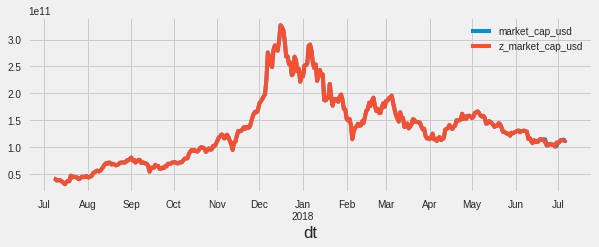

In [151]:
# quick integrity checks
plt.style.use('fivethirtyeight')
df['z_market_cap_usd'] = df.market_price_usd * df.btc_supply
df[['market_cap_usd','z_market_cap_usd']].plot(figsize=(9,3))
print 'Diff: %.2f' % sum(df.market_cap_usd - df.z_market_cap_usd)
del df['z_market_cap_usd']

### NVT Blockchain Info Charts 

### NVT Numerator

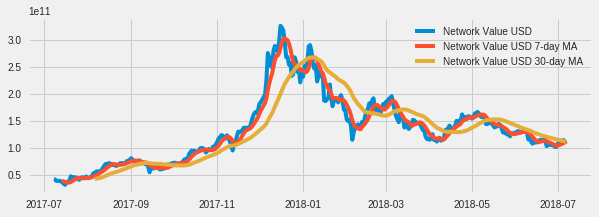

In [152]:
plt.figure(figsize=(9,3))
plt.plot(df.index,df.market_cap_usd,label='Network Value USD')
plt.plot(df.index,df.market_cap_usd.rolling(7).mean(),label='Network Value USD 7-day MA')
plt.plot(df.index,df.market_cap_usd.rolling(30).mean(),label='Network Value USD 30-day MA')
plt.legend()
plt.show()

### NVT Denominator

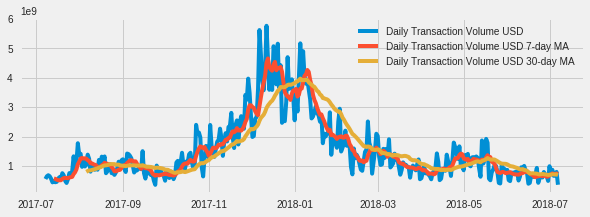

In [153]:
plt.figure(figsize=(9,3))
plt.plot(df.index,df.tranx_vol_usd,label='Daily Transaction Volume USD')
plt.plot(df.index,df.tranx_vol_usd.rolling(7).mean(),label='Daily Transaction Volume USD 7-day MA')
plt.plot(df.index,df.tranx_vol_usd.rolling(30).mean(),label='Daily Transaction Volume USD 30-day MA')
plt.legend()
plt.show()

### NVT ratio

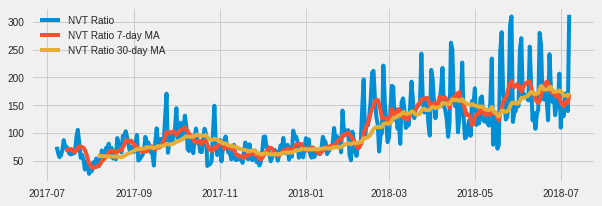

In [154]:
# NVT without moving averages
df['NVT'] = df.market_cap_usd / df.tranx_vol_usd
plt.figure(figsize=(9,3))
plt.plot(df.index,df.NVT,label='NVT Ratio')
plt.plot(df.index,df.NVT.rolling(7).mean(),label='NVT Ratio 7-day MA')
plt.plot(df.index,df.NVT.rolling(30).mean(),label='NVT Ratio 30-day MA')
plt.legend()
plt.show()

## Crypto Compare API
The best free API for getting cryptocurrency live pricing data, OHLC historical data, volume data or tick data from multiple exchanges. You can also get free aggregated news and block explorer data (supply, hashrate, latest block number etc). We recommend that you add the name of your application/website to the extraParams parameter with every API call.

https://min-api.cryptocompare.com/

### Crypto symbols

In [54]:
cc_coinlist_url = 'https://min-api.cryptocompare.com/data/all/coinlist'
cc_coinlist_resp = requests.get(cc_coinlist_url)
print cc_coinlist_resp.status_code
print cc_coinlist_resp.json().keys()

200
[u'DefaultWatchlist', u'Type', u'BaseImageUrl', u'BaseLinkUrl', u'SponosoredNews', u'Message', u'Data', u'Response']


In [55]:
coinlist_symbols = cc_coinlist_resp.json()['Data'].keys()
print('{0} - {1}'.format(len(coinlist_symbols),coinlist_symbols[0:10]))
print cc_coinlist_resp.json()['Data']['BTC']
coinlist_df = pd.DataFrame([cc_coinlist_resp.json()['Data'][symbol] for symbol in coinlist_symbols])
print coinlist_df.shape
coinlist_df.head(2)

2738 - [u'LIFE', u'XBY', u'AGI', u'B2X', u'CSNO', u'XBP', u'XBS', u'ORME', u'XBI', u'NYC']
{u'CoinName': u'Bitcoin', u'PreMinedValue': u'N/A', u'Name': u'BTC', u'Algorithm': u'SHA256', u'FullyPremined': u'0', u'Url': u'/coins/btc/overview', u'ImageUrl': u'/media/19633/btc.png', u'IsTrading': True, u'Id': u'1182', u'ProofType': u'PoW', u'Sponsored': False, u'SortOrder': u'1', u'TotalCoinSupply': u'21000000', u'FullName': u'Bitcoin (BTC)', u'TotalCoinsFreeFloat': u'N/A', u'Symbol': u'BTC'}
(2738, 16)


,Algorithm,CoinName,FullName,FullyPremined,Id,ImageUrl,IsTrading,Name,PreMinedValue,ProofType,SortOrder,Sponsored,Symbol,TotalCoinSupply,TotalCoinsFreeFloat,Url
0,N/A,LIFE,LIFE (LIFE),0,381189,/media/14913568/life.png,True,LIFE,N/A,N/A,1834,False,LIFE,100000000000,N/A,/coins/life/overview
1,N/A,XtraBYtes,XtraBYtes (XBY),0,66694,/media/20780760/xby.png,True,XBY,N/A,PoSign,1185,False,XBY,650000000,N/A,/coins/xby/overview


In [56]:
coinlist_df.FullyPremined.value_counts(normalize=True)

0    0.965303
1    0.034697
Name: FullyPremined, dtype: float64

### Top N coins by total volume
Get a number of top coins by their total volume accross all markets in the last 24 hours. 

In [57]:
top_tot_vol_url = 'https://min-api.cryptocompare.com/data/top/totalvol?limit=10&tsym=USD'
top_tot_vol_resp = requests.get(top_tot_vol_url)
print top_tot_vol_resp.status_code
print top_tot_vol_resp.json()['Data'][0]

200
{u'ConversionInfo': {u'Conversion': u'direct', u'ConversionSymbol': u'', u'Supply': 17138200, u'SubsNeeded': [u'5~CCCAGG~BTC~USD'], u'SubBase': u'5~', u'CurrencyFrom': u'BTC', u'RAW': [u'5~CCCAGG~BTC~USD~4~6750.61~1531064645~0.05346829~360.9109575~1531064645.6729~27460.657832220382~185734696.02333802~47148.511618667224~316830897.3397891~6758.08~6782.85~6712.34~6560.54~6836.49~6509.72~Kraken~7ffe9'], u'CurrencyTo': u'USD', u'TotalVolume24H': 450959.89098540286, u'Market': u'CCCAGG'}, u'CoinInfo': {u'NetHashesPerSecond': 38395291829.5264, u'Name': u'BTC', u'Algorithm': u'SHA256', u'BlockReward': 12.5, u'Url': u'/coins/btc/overview', u'ImageUrl': u'/media/19633/btc.png', u'BlockNumber': 531059, u'ProofType': u'PoW', u'BlockTime': 600, u'Internal': u'BTC', u'DocumentType': u'Webpagecoinp', u'FullName': u'Bitcoin', u'Type': 1, u'Id': u'1182'}}


In [58]:
top_n_list = top_tot_vol_resp.json()['Data']
top_n_df = pd.DataFrame([x['ConversionInfo'] for x in top_n_list]).sort_values('TotalVolume24H',ascending=False)
print top_n_df.shape
print top_n_df.CurrencyFrom.tolist()
top_n_df.head(2)

(10, 10)
[u'TRX', u'XRP', u'EOS', u'ETC', u'QTUM', u'LTC', u'NEO', u'ETH', u'BCH', u'BTC']


,Conversion,ConversionSymbol,CurrencyFrom,CurrencyTo,Market,RAW,SubBase,SubsNeeded,Supply,TotalVolume24H
9,direct,,TRX,USD,CCCAGG,[5~CCCAGG~TRX~USD~4~0.03796~1531064355~67560.9...,5~,[5~CCCAGG~TRX~USD],1.000000e+11,1.859234e+09
6,direct,,XRP,USD,CCCAGG,[5~CCCAGG~XRP~USD~2~0.4852~1531064639~42.79796...,5~,[5~CCCAGG~XRP~USD],3.830587e+10,4.378545e+08


TOTALVOLUME24H is the amount the coin has been traded in 24 hours against ALL its trading pairs, whereas VOLUME24HOUR is the volume of a given coin traded against the specified coin pair selected. (Using NEO for example, VOLUME24HOUR for NEO-BTC would return the volume across only this pair whereas TOTALVOLUME24H would represent the total volume NEO has traded in ETH, BTC and USDT).

In [59]:
top_n_df.Conversion.value_counts()

direct    10
Name: Conversion, dtype: int64

### Top N trading pairs
Get top pairs by volume for a currency (always uses our aggregated data). 

In [60]:
top_pairs_url = 'https://min-api.cryptocompare.com/data/top/pairs?'
top_pairs_list = []
for c in top_n_df.CurrencyFrom.tolist():
  top_pairs_resp = requests.get(top_pairs_url,params={'limit':10,'fsym':c})
  top_pairs_list.extend(top_pairs_resp.json()['Data'])
print len(top_pairs_list)
print top_pairs_list[0]
print top_pairs_list[-1]

98
{u'toSymbol': u'BTC', u'volume24hTo': 5354.426979409588, u'volume24h': 968099944.2471222, u'fromSymbol': u'TRX', u'exchange': u'CCCAGG'}
{u'toSymbol': u'GBP', u'volume24hTo': 3118732.6164154424, u'volume24h': 621.3355650699999, u'fromSymbol': u'BTC', u'exchange': u'CCCAGG'}


In [61]:
top_pairs_df = pd.DataFrame(top_pairs_list)
print top_pairs_df.shape
top_pairs_df['isCoinToCoin'] = top_pairs_df.toSymbol.apply(lambda x: x in coinlist_df.Symbol.tolist())
top_pairs_df.head()

(98, 5)


,exchange,fromSymbol,toSymbol,volume24h,volume24hTo,isCoinToCoin
0,CCCAGG,TRX,BTC,9.680999e+08,5.354427e+03,True
1,CCCAGG,TRX,USDT,6.325855e+08,2.329070e+07,True
2,CCCAGG,TRX,ETH,2.491898e+08,1.937459e+04,True
3,CCCAGG,TRX,USD,9.627845e+06,3.620432e+05,False
4,CCCAGG,TRX,RUR,9.298309e+04,2.195014e+05,False


VOLUME24HOUR is the trading volume of a coin pair in terms of the from symbol whereas VOLUME24HOURTO is the trading volume of the pair in terms of the second symbol. (Using ETH-USD as an example, VOLUME24HOUR would return the trading volume in terms ETH and VOLUME24HOURTO would return the trading volume in USD).

In [62]:
print top_pairs_df[top_pairs_df.isCoinToCoin].toSymbol.value_counts()
print top_pairs_df[~top_pairs_df.isCoinToCoin].toSymbol.value_counts()

USDT     10
BTC       9
ETH       8
BCH       5
HT        4
BNB       4
WAVES     2
DOGE      1
Name: toSymbol, dtype: int64
USD     10
QC       9
KRW      9
EUR      8
JPY      5
GBP      3
CNYT     3
ZB       2
AIC*     1
RUR      1
TRY      1
RUB      1
AUD      1
PLN      1
Name: toSymbol, dtype: int64


Symbol Footnotes:


*   AIC* - AI Crypto on Ethereum, had ICO on June 4th
*   CNYT - CNY (Chinese Yuan) Tether - unclear?
*   ZB - ZB crypto exchange platform
*   QC - Qcash is a independent digital currency contracts 



### Crypto currency pairs

In [63]:
compare_base_url = 'https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=365'
cc_resp = requests.get(compare_base_url)
print cc_resp.status_code
print cc_resp.json()
print 'Time From:  ',cc_resp.json()['TimeFrom'], ' Time To:  ', cc_resp.json()['TimeTo']
btc_usd = pd.DataFrame(cc_resp.json()['Data'])
btc_usd['dt'] = pd.to_datetime(btc_usd.time, unit='s')
btc_usd.set_index(btc_usd.dt, inplace=True)
btc_usd.head()

200
{u'FirstValueInArray': True, u'TimeFrom': 1499472000, u'Type': 100, u'TimeTo': 1531008000, u'Aggregated': False, u'Data': [{u'volumeto': 136973389.49, u'high': 2568.73, u'low': 2480.62, u'time': 1499472000, u'volumefrom': 54508.76, u'close': 2564.86, u'open': 2513.88}, {u'volumeto': 99506518.51, u'high': 2576.73, u'low': 2509.65, u'time': 1499558400, u'volumefrom': 39161.96, u'close': 2511.43, u'open': 2564.86}, {u'volumeto': 297270301, u'high': 2530.34, u'low': 2271.79, u'time': 1499644800, u'volumefrom': 123797.54, u'close': 2344.02, u'open': 2511.43}, {u'volumeto': 341998621.09, u'high': 2412.75, u'low': 2265.48, u'time': 1499731200, u'volumefrom': 146630.2, u'close': 2324.29, u'open': 2344.02}, {u'volumeto': 257095280.13, u'high': 2424.82, u'low': 2262.08, u'time': 1499817600, u'volumefrom': 109522.9, u'close': 2403.09, u'open': 2324.29}, {u'volumeto': 208630220.69, u'high': 2436.66, u'low': 2334.96, u'time': 1499904000, u'volumefrom': 88166.37, u'close': 2362.44, u'open': 2403

,close,high,low,open,time,volumefrom,volumeto,dt
dt,,,,,,,,
2017-07-08,2564.86,2568.73,2480.62,2513.88,1499472000,54508.76,1.369734e+08,2017-07-08
2017-07-09,2511.43,2576.73,2509.65,2564.86,1499558400,39161.96,9.950652e+07,2017-07-09
2017-07-10,2344.02,2530.34,2271.79,2511.43,1499644800,123797.54,2.972703e+08,2017-07-10
2017-07-11,2324.29,2412.75,2265.48,2344.02,1499731200,146630.20,3.419986e+08,2017-07-11
2017-07-12,2403.09,2424.82,2262.08,2324.29,1499817600,109522.90,2.570953e+08,2017-07-12


In [64]:
compare_base_url = 'https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=365'
eth_resp = requests.get(compare_base_url)
print eth_resp.status_code
print eth_resp.json()
print 'Time From:  ',eth_resp.json()['TimeFrom'], ' Time To:  ', eth_resp.json()['TimeTo']
eth_usd = pd.DataFrame(eth_resp.json()['Data'])
eth_usd['dt'] = pd.to_datetime(eth_usd.time, unit='s')
eth_usd.set_index(eth_usd.dt, inplace=True)
eth_usd.head()

200
{u'FirstValueInArray': True, u'TimeFrom': 1499472000, u'Type': 100, u'TimeTo': 1531008000, u'Aggregated': False, u'Data': [{u'volumeto': 139823006.33, u'high': 248.35, u'low': 230.96, u'time': 1499472000, u'volumefrom': 583786.44, u'close': 245.67, u'open': 240.94}, {u'volumeto': 76538488.68, u'high': 251.79, u'low': 236.59, u'time': 1499558400, u'volumefrom': 313936.23, u'close': 237.72, u'open': 245.67}, {u'volumeto': 274808713.13, u'high': 240.09, u'low': 188.21, u'time': 1499644800, u'volumefrom': 1279710.77, u'close': 205.76, u'open': 237.72}, {u'volumeto': 368656185.14, u'high': 216.16, u'low': 175.21, u'time': 1499731200, u'volumefrom': 1904168.17, u'close': 190.55, u'open': 205.76}, {u'volumeto': 289483936.34, u'high': 227.06, u'low': 181.62, u'time': 1499817600, u'volumefrom': 1403985.29, u'close': 224.15, u'open': 190.55}, {u'volumeto': 196303864.51, u'high': 226.66, u'low': 193.2, u'time': 1499904000, u'volumefrom': 949977.28, u'close': 205.41, u'open': 224.15}, {u'volum

,close,high,low,open,time,volumefrom,volumeto,dt
dt,,,,,,,,
2017-07-08,245.67,248.35,230.96,240.94,1499472000,583786.44,1.398230e+08,2017-07-08
2017-07-09,237.72,251.79,236.59,245.67,1499558400,313936.23,7.653849e+07,2017-07-09
2017-07-10,205.76,240.09,188.21,237.72,1499644800,1279710.77,2.748087e+08,2017-07-10
2017-07-11,190.55,216.16,175.21,205.76,1499731200,1904168.17,3.686562e+08,2017-07-11
2017-07-12,224.15,227.06,181.62,190.55,1499817600,1403985.29,2.894839e+08,2017-07-12


In [65]:
compare_base_url = 'https://min-api.cryptocompare.com/data/histoday?fsym=ZEC&tsym=USD&limit=365'
zec_resp = requests.get(compare_base_url)
print zec_resp.status_code
print zec_resp.json()
print 'Time From:  ',zec_resp.json()['TimeFrom'], ' Time To:  ', zec_resp.json()['TimeTo']
zec_usd = pd.DataFrame(zec_resp.json()['Data'])
zec_usd['dt'] = pd.to_datetime(zec_usd.time, unit='s')
zec_usd.set_index(zec_usd.dt, inplace=True)
zec_usd.head()

200
{u'FirstValueInArray': True, u'TimeFrom': 1499472000, u'Type': 100, u'TimeTo': 1531008000, u'Aggregated': False, u'Data': [{u'volumeto': 3571899.46, u'high': 250.43, u'low': 231.26, u'time': 1499472000, u'volumefrom': 14701.98, u'close': 249.8, u'open': 248.06}, {u'volumeto': 2882997.34, u'high': 262.78, u'low': 241.24, u'time': 1499558400, u'volumefrom': 11413.37, u'close': 241.43, u'open': 249.8}, {u'volumeto': 5966669.72, u'high': 242.65, u'low': 179.5, u'time': 1499644800, u'volumefrom': 28207.63, u'close': 196.09, u'open': 241.43}, {u'volumeto': 6856401, u'high': 206.56, u'low': 167.65, u'time': 1499731200, u'volumefrom': 37732.08, u'close': 176.76, u'open': 196.09}, {u'volumeto': 4570202.81, u'high': 221.06, u'low': 163.3, u'time': 1499817600, u'volumefrom': 23575.39, u'close': 211.4, u'open': 176.76}, {u'volumeto': 2569022.92, u'high': 219.84, u'low': 184.87, u'time': 1499904000, u'volumefrom': 12971.98, u'close': 194.59, u'open': 211.4}, {u'volumeto': 2228795.35, u'high': 1

,close,high,low,open,time,volumefrom,volumeto,dt
dt,,,,,,,,
2017-07-08,249.80,250.43,231.26,248.06,1499472000,14701.98,3571899.46,2017-07-08
2017-07-09,241.43,262.78,241.24,249.80,1499558400,11413.37,2882997.34,2017-07-09
2017-07-10,196.09,242.65,179.50,241.43,1499644800,28207.63,5966669.72,2017-07-10
2017-07-11,176.76,206.56,167.65,196.09,1499731200,37732.08,6856401.00,2017-07-11
2017-07-12,211.40,221.06,163.30,176.76,1499817600,23575.39,4570202.81,2017-07-12


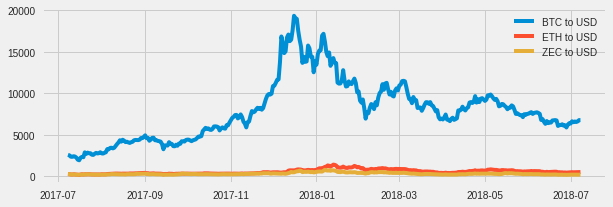

In [66]:
plt.figure(figsize=(9,3))
plt.plot(btc_usd.index,btc_usd.close,label='BTC to USD')
plt.plot(eth_usd.index,eth_usd.close,label='ETH to USD')
plt.plot(zec_usd.index,zec_usd.close,label='ZEC to USD')
plt.legend()
plt.show()

## CoinGecko
Access CoinGecko (https://www.coingecko.com) data with this API such as live pricing,
historical, volume, tickers, exchanges, developer, community, and public interest.
We have integrated with over 100 exchanges and over 2000 coins and tokens.
(For raw documentation, visit https://www.coingecko.com/api_doc).

### Coins list
Use this to obtain all the coins’ id in order to make API calls

In [155]:
gecko_list_url = 'https://api.coingecko.com/api/v3/coins/list'
gecko_list_resp = requests.get(gecko_list_url)
print gecko_list_resp.status_code
gecko_list_df = pd.DataFrame(gecko_list_resp.json())
print gecko_list_df.shape
gecko_list_df.head()

200
(2091, 3)


,id,name,symbol
0,bitcoin,Bitcoin,btc
1,litecoin,Litecoin,ltc
2,auroracoin,Auroracoin,aur
3,peercoin,Peercoin,ppc
4,dogecoin,Dogecoin,doge


### Coin data
List all coins with data (name, price, market, developer, community, etc)

'community_data',
 'name',
 'localization',
 'public_interest_stats',
 'symbol',
 'image',
 'coingecko_score',
 'last_updated',
 'developer_data',
 'market_data',
 'id'

In [156]:
gecko_coins_url = 'https://api.coingecko.com/api/v3/coins'
gecko_coins_resp = requests.get(gecko_coins_url,params={'order':'market_cap_desc','per_page':100})
print gecko_coins_resp.status_code
print gecko_coins_resp.json()[0]

200
{u'community_data': {u'facebook_likes': 38225, u'reddit_accounts_active_48h': 11000, u'twitter_followers': 60261, u'reddit_subscribers': 883173, u'reddit_average_posts_48h': 3.111, u'reddit_average_comments_48h': 199.741}, u'name': u'Bitcoin', u'localization': {u'ru': u'\u0431\u0438\u0442\u043a\u043e\u0438\u043d\u0430', u'fr': u'Bitcoin', u'en': u'Bitcoin', u'zh': u'\u6bd4\u7279\u5e01', u'pt': u'Bitcoin', u'zh-tw': u'\u6bd4\u7279\u5e63', u'de': u'Bitcoin', u'ko': u'\ube44\ud2b8\ucf54\uc778', u'it': u'Bitcoin', u'ja': u'\u30d3\u30c3\u30c8\u30b3\u30a4\u30f3', u'tr': u'Bitcoin', u'ar': u'\u0628\u064a\u062a\u0643\u0648\u064a\u0646', u'pl': u'Bitcoin', u'th': u'\u0e1a\u0e34\u0e15\u0e04\u0e2d\u0e22\u0e19\u0e4c', u'vi': u'Bitcoin', u'id': u'Bitcoin', u'es': u'Bitcoin'}, u'public_interest_stats': {u'bing_matches': 33000000, u'alexa_rank': 13219}, u'symbol': u'btc', u'image': {u'small': u'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1510040391', u'thumb': u'https://assets.c

### Coin data by date
Get historical data (name, price, market, stats) at a given date for a coin

In [157]:
gecko_hist_url = 'https://api.coingecko.com/api/v3/coins/{coin_id}/history'.format(coin_id='bitcoin')
gecko_hist_resp = requests.get(gecko_hist_url,params={'date':'28-11-2017'})
print gecko_hist_resp.status_code
print gecko_hist_resp.json()

200
{u'community_data': {u'facebook_likes': 35258, u'reddit_accounts_active_48h': u'16910.0', u'twitter_followers': 77, u'reddit_subscribers': 451841, u'reddit_average_posts_48h': 2.333, u'reddit_average_comments_48h': 602.5}, u'name': u'Bitcoin', u'localization': {u'ru': u'\u0431\u0438\u0442\u043a\u043e\u0438\u043d\u0430', u'fr': u'Bitcoin', u'en': u'Bitcoin', u'zh': u'\u6bd4\u7279\u5e01', u'pt': u'Bitcoin', u'zh-tw': u'\u6bd4\u7279\u5e63', u'de': u'Bitcoin', u'ko': u'\ube44\ud2b8\ucf54\uc778', u'it': u'Bitcoin', u'ja': u'\u30d3\u30c3\u30c8\u30b3\u30a4\u30f3', u'tr': u'Bitcoin', u'ar': u'\u0628\u064a\u062a\u0643\u0648\u064a\u0646', u'pl': u'Bitcoin', u'th': u'\u0e1a\u0e34\u0e15\u0e04\u0e2d\u0e22\u0e19\u0e4c', u'vi': u'Bitcoin', u'id': u'Bitcoin', u'es': u'Bitcoin'}, u'public_interest_stats': {u'bing_matches': 30800000, u'alexa_rank': 4752}, u'symbol': u'btc', u'image': {u'small': u'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1510040391', u'thumb': u'https://assets.co

### Market chart
Get historical market data include price, market cap, and 24h volume (granularity auto)

[u'prices', u'market_caps', u'total_volumes']

In [158]:
gecko_market_url = 'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'.format(coin_id='bitcoin')
gecko_market_resp = requests.get(gecko_market_url,params={'vs_currency':'krw','days':365})
print gecko_market_resp.status_code
print gecko_market_resp.json().keys()

200
[u'prices', u'market_caps', u'total_volumes']


## CoinWarz
CoinWarz provides users with information on the profitability of various cryptocurrencies that are available for mining or trading. It brings together information from currency exchanges such as MtGox, BTCe, and mcxNow on its site. Its CoinWarz API allows developers to retrieve information from the site in JSON format.

https://www.coinwarz.com/faq

https://www.coinwarz.com/v1/api/documentation

### Mining profitability 

In [159]:
cwarz_mining_url = 'http://www.coinwarz.com/v1/api/profitability'
cwarz_mining_resp = requests.get(cwarz_mining_url,params={'apikey':kd['CoinWarz'],'algo':'all'})
print cwarz_mining_resp.status_code
print cwarz_mining_resp.json()

200
{u'Message': u'996 api calls remaining.', u'Data': [{u'BlockReward': 4, u'CoinName': u'Ethereum-Classic', u'AvgProfitRatio': 220.85936439036948, u'Algorithm': u'EtHash', u'Exchange': u'Poloniex', u'ProfitRatio': 203.18313599591738, u'ExchangeRate': 0.0027425, u'BlockCount': 6141485, u'CoinTag': u'ETC', u'Difficulty': 169773449426472, u'IsBlockExplorerOnline': True, u'ExchangeVolume': 49283.85012089, u'HealthStatus': u'Healthy', u'IsExchangeOnline': True, u'Message': u'', u'BlockTimeInSeconds': 15}, {u'BlockReward': 3, u'CoinName': u'Ethereum', u'AvgProfitRatio': 217.44875198779394, u'Algorithm': u'EtHash', u'Exchange': u'Poloniex', u'ProfitRatio': 195.55447122733943, u'ExchangeRate': 0.07269, u'BlockCount': 5929029, u'CoinTag': u'ETH', u'Difficulty': 3459413886078210.0, u'IsBlockExplorerOnline': True, u'ExchangeVolume': 5310.25393248, u'HealthStatus': u'Healthy', u'IsExchangeOnline': True, u'Message': u'', u'BlockTimeInSeconds': 15}, {u'BlockReward': 50, u'CoinName': u'eMark', u'Av

In [160]:
cwarz_mining_df = pd.DataFrame(cwarz_mining_resp.json()['Data'])
print cwarz_mining_df.shape
cwarz_mining_df.head(3)

(53, 16)


,Algorithm,AvgProfitRatio,BlockCount,BlockReward,BlockTimeInSeconds,CoinName,CoinTag,Difficulty,Exchange,ExchangeRate,ExchangeVolume,HealthStatus,IsBlockExplorerOnline,IsExchangeOnline,Message,ProfitRatio
0,EtHash,220.859364,6141485,4.0,15,Ethereum-Classic,ETC,1.697734e+14,Poloniex,0.002743,49283.850121,Healthy,True,True,,203.183136
1,EtHash,217.448752,5929029,3.0,15,Ethereum,ETH,3.459414e+15,Poloniex,0.072690,5310.253932,Healthy,True,True,,195.554471
2,SHA-256,78.086932,1850012,50.0,120,eMark,DEM,3.673972e+07,Cryptopia,0.000002,44106.499640,Healthy,True,True,,159.058037


### Coin information

In [161]:
cwarz_info_url = 'http://www.coinwarz.com/v1/api/coininformation'
cwarz_info_resp = requests.get(cwarz_info_url,params={'apikey':kd['CoinWarz'],'cointag':'CANN'})
print cwarz_info_resp.status_code
print cwarz_info_resp.json()

200
{u'Message': u'995 api calls remaining.', u'Data': {u'BlockReward': 70, u'CoinName': u'CannabisCoin', u'Algorithm': u'X11', u'ExchangeRates': [{u'Volume': 29011.92196155, u'ToBTC': 3.86e-06, u'ToUSD': 0.0, u'TimeStamp': 1531053631.1899998, u'Exchange': u'Bittrex'}], u'BlockCount': 3011744, u'CoinTag': u'CANN', u'Difficulty': 233072.60676238, u'IsBlockExplorerOnline': True, u'HealthStatus': u'Healthy', u'IsExchangeOnline': True, u'Message': u'', u'BlockTimeInSeconds': 42}, u'Success': True}


## FRED
Federal Reserve Economic Data - https://fred.stlouisfed.org/categories

Developer API:  https://research.stlouisfed.org/docs/api/



### Coinbase Asset Management index
Given the volatility in the cryptocurrency markets, users may wish to view the large variation in values in a log scale. Changes in the data can be analyzed by turning on a log scale functionality that can be applied in the Format tab under Edit Graph button. 
For more information to the Coinbase index, see https://am.coinbase.com/index 

In [162]:
fred_url = 'https://api.stlouisfed.org/fred/series/observations'
beg = dt.datetime.now()
beg = beg.replace(year=beg.year-1).date()
params = {'api_key':kd['FRED'],'series_id':'CBCCIND','file_type':'json','observation_start':beg,}
fred_resp = requests.get(fred_url,params)
print fred_resp.status_code
print fred_resp.json()

200
{u'count': 365, u'order_by': u'observation_date', u'observation_start': u'2017-07-08', u'file_type': u'json', u'observation_end': u'9999-12-31', u'realtime_end': u'2018-07-08', u'sort_order': u'asc', u'limit': 100000, u'observations': [{u'date': u'2017-07-08', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'1332.14945818'}, {u'date': u'2017-07-09', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'1298.61802008'}, {u'date': u'2017-07-10', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'1171.407768'}, {u'date': u'2017-07-11', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'1141.35735114'}, {u'date': u'2017-07-12', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'1229.83517052'}, {u'date': u'2017-07-13', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'1179.51884586'}, {u'date': u'2017-07-14', u'realtime_start'

In [163]:
coinbase_ix = pd.DataFrame(fred_resp.json()['observations'])
coinbase_ix.drop(['realtime_end','realtime_start'],axis=1,inplace=True)
coinbase_ix.set_index(pd.to_datetime(coinbase_ix.date),inplace=True)
coinbase_ix.value = coinbase_ix.value.astype('float')
print coinbase_ix.shape
print coinbase_ix.dtypes
coinbase_ix.head(2)

(365, 2)
date      object
value    float64
dtype: object


,date,value
date,,
2017-07-08,2017-07-08,1332.149458
2017-07-09,2017-07-09,1298.618020


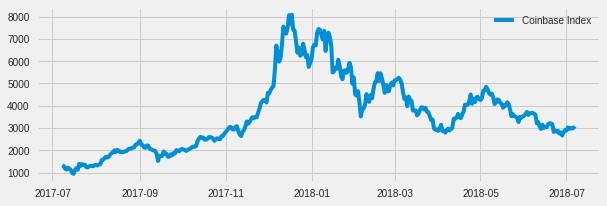

In [164]:
plt.figure(figsize=(9,3))
plt.plot(coinbase_ix.index,coinbase_ix['value'],label='Coinbase Index')
plt.legend()
plt.show()

### VIX

In [165]:
fred_url = 'https://api.stlouisfed.org/fred/series/observations'
beg = dt.datetime.now()
beg = beg.replace(year=beg.year-1).date()
params = {'api_key':kd['FRED'],'series_id':'VIXCLS','file_type':'json','observation_start':beg,}
fred_resp = requests.get(fred_url,params)
print fred_resp.status_code
print fred_resp.json()

200
{u'count': 259, u'order_by': u'observation_date', u'observation_start': u'2017-07-08', u'file_type': u'json', u'observation_end': u'9999-12-31', u'realtime_end': u'2018-07-08', u'sort_order': u'asc', u'limit': 100000, u'observations': [{u'date': u'2017-07-10', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'11.11'}, {u'date': u'2017-07-11', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'10.89'}, {u'date': u'2017-07-12', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'10.30'}, {u'date': u'2017-07-13', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'9.90'}, {u'date': u'2017-07-14', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'9.51'}, {u'date': u'2017-07-17', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'9.82'}, {u'date': u'2017-07-18', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', 

In [166]:
vix = pd.DataFrame(fred_resp.json()['observations'])
vix.drop(['realtime_end','realtime_start'],axis=1,inplace=True)
vix.set_index(pd.to_datetime(vix.date),inplace=True)
vix.value = pd.to_numeric(vix.value,errors='coerce')
print vix.shape
vix.head(2)

(259, 2)


,date,value
date,,
2017-07-10,2017-07-10,11.11
2017-07-11,2017-07-11,10.89


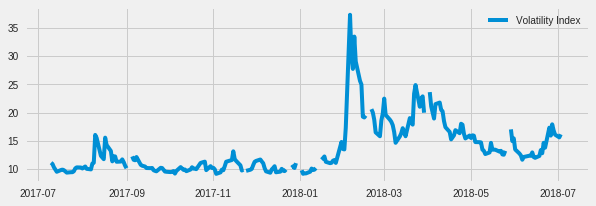

In [167]:
plt.figure(figsize=(9,3))
plt.plot(vix.index,vix['value'],label='Volatility Index')
plt.legend()
plt.show()

### S&P 500

In [168]:
fred_url = 'https://api.stlouisfed.org/fred/series/observations'
beg = dt.datetime.now()
beg = beg.replace(year=beg.year-1).date()
params = {'api_key':kd['FRED'],'series_id':'SP500','file_type':'json','observation_start':beg,}
fred_resp = requests.get(fred_url,params)
print fred_resp.status_code
print fred_resp.json()

200
{u'count': 260, u'order_by': u'observation_date', u'observation_start': u'2017-07-08', u'file_type': u'json', u'observation_end': u'9999-12-31', u'realtime_end': u'2018-07-08', u'sort_order': u'asc', u'limit': 100000, u'observations': [{u'date': u'2017-07-10', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'2427.43'}, {u'date': u'2017-07-11', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'2425.53'}, {u'date': u'2017-07-12', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'2443.25'}, {u'date': u'2017-07-13', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'2447.83'}, {u'date': u'2017-07-14', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'2459.27'}, {u'date': u'2017-07-17', u'realtime_start': u'2018-07-08', u'realtime_end': u'2018-07-08', u'value': u'2459.14'}, {u'date': u'2017-07-18', u'realtime_start': u'2018-07-08', u'realtime_end': 

In [169]:
sp500 = pd.DataFrame(fred_resp.json()['observations'])
sp500.drop(['realtime_end','realtime_start'],axis=1,inplace=True)
sp500.set_index(pd.to_datetime(sp500.date),inplace=True)
sp500.value = pd.to_numeric(sp500.value,errors='coerce')
print sp500.shape
sp500.head(2)

(260, 2)


,date,value
date,,
2017-07-10,2017-07-10,2427.43
2017-07-11,2017-07-11,2425.53


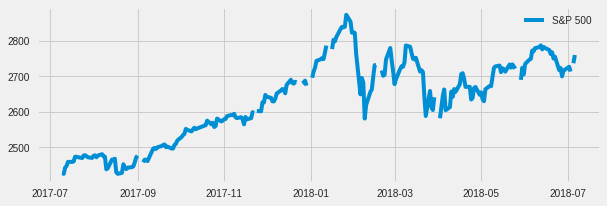

In [170]:
plt.figure(figsize=(9,3))
plt.plot(sp500.index,sp500['value'],label='S&P 500')
plt.legend()
plt.show()

## CRIX 
The CRyptocurrency IndeX is a benchmark for the crypto market. It is dedicated to give everyone, who is interested, insight about the current and past movement of this young market. The CRIX is realtime computed by the Ladislaus von Bortkiewicz Chair of Statistics at Humboldt University Berlin, Germany. The development was a joint work together with SKBI at Singapore Management University and CoinGecko, who still provide the data for the computation. Currently, the CRIX consists of 20 index members. This number was found with statistical methods, see for more details the Methodology.

http://thecrix.de/#page-top

### CRIX Closing Data

In [171]:
crix_close_url = 'http://thecrix.de/data/crix.json'
crix_close_resp = requests.get(crix_close_url)
print crix_close_resp.status_code
print crix_close_resp.json()

200
[{u'date': u'2014-07-31', u'price': 1000}, {u'date': u'2014-08-01', u'price': 1018.20271680782}, {u'date': u'2014-08-02', u'price': 1008.77238928543}, {u'date': u'2014-08-03', u'price': 1004.41650004471}, {u'date': u'2014-08-04', u'price': 1004.98413805384}, {u'date': u'2014-08-05', u'price': 998.041056483019}, {u'date': u'2014-08-06', u'price': 999.866317819125}, {u'date': u'2014-08-07', u'price': 1006.14400486159}, {u'date': u'2014-08-08', u'price': 1012.50563512497}, {u'date': u'2014-08-09', u'price': 1006.84619297706}, {u'date': u'2014-08-10', u'price': 1006.86503987837}, {u'date': u'2014-08-11', u'price': 980.933121733115}, {u'date': u'2014-08-12', u'price': 970.507694258587}, {u'date': u'2014-08-13', u'price': 930.476551997961}, {u'date': u'2014-08-14', u'price': 862.782202070091}, {u'date': u'2014-08-15', u'price': 843.515369168307}, {u'date': u'2014-08-16', u'price': 891.020720346731}, {u'date': u'2014-08-17', u'price': 846.518077661584}, {u'date': u'2014-08-18', u'price': 

In [172]:
crix = pd.DataFrame(crix_close_resp.json())
crix.set_index(pd.to_datetime(crix.date),inplace=True)
print crix.shape
crix.head()

(1438, 2)


,date,price
date,,
2014-07-31,2014-07-31,1000.000000
2014-08-01,2014-08-01,1018.202717
2014-08-02,2014-08-02,1008.772389
2014-08-03,2014-08-03,1004.416500
2014-08-04,2014-08-04,1004.984138


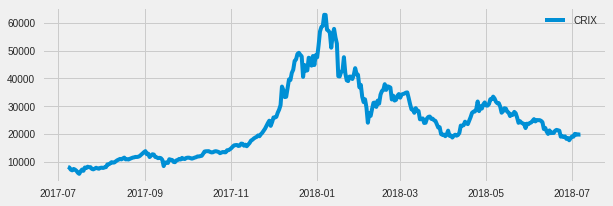

In [173]:
plt.figure(figsize=(9,3))
plt.plot(crix[-365:].index,crix[-365:].price,label='CRIX')
plt.legend()
plt.show()